# Geospatial demand estimation

**Original code:**  [Ariane Millot](https://github.com/ariane-millot), [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Support:** [Martin J. Stringer](), [Andjelka Kerekes](), [Roberto Heredia]()<br />
**Funding:** Climate Compatible Growth Programme, Imperial College <br />

---------------------------


#### Brief overview

This notebook performs three main analytical processes:

- **Part 1**: Generated grid mesh (H3 hexagons) for the area of interest (given input admin boundary)
- **Part 2**: Extract GIS-based attributes (vecror or raster) to the grid
- **Part 3**: Build blocks estimating demand for the different energy vectors

A slightly more detailed description of the processing bits is presented before each part below. <br />


### Import necessary modules

In [1]:
### Activate geospatial_env first

# Numeric
import numpy as np
import pandas as pd

# System
import importlib

# Spatial
import geopandas as gpd

# Mapping / Plotting
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
from matplotlib.ticker import MaxNLocator
from matplotlib_scalebar.scalebar import ScaleBar
import seaborn as sns

In [42]:
import config
importlib.reload(config)

INFO: Successfully loaded configuration for Zambia from config.py.


<module 'config' from 'C:\\Users\\amillot\\PycharmProjects\\EDeMOS\\config.py'>

In [39]:
# Utility and Data Loading Modules
from utils import processing_raster, finalizing_rasters, spatialjoinvectors
from data_loader import load_initial_data
import plotting
importlib.reload(plotting)
from plotting import *

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

# Part 1. Create base grid with H3

COUNTRY
EPSG:4326
Creating a buffer to ensure full hexagon coverage...
Buffer created successfully.
Clipping hexagons and attaching region attributes...


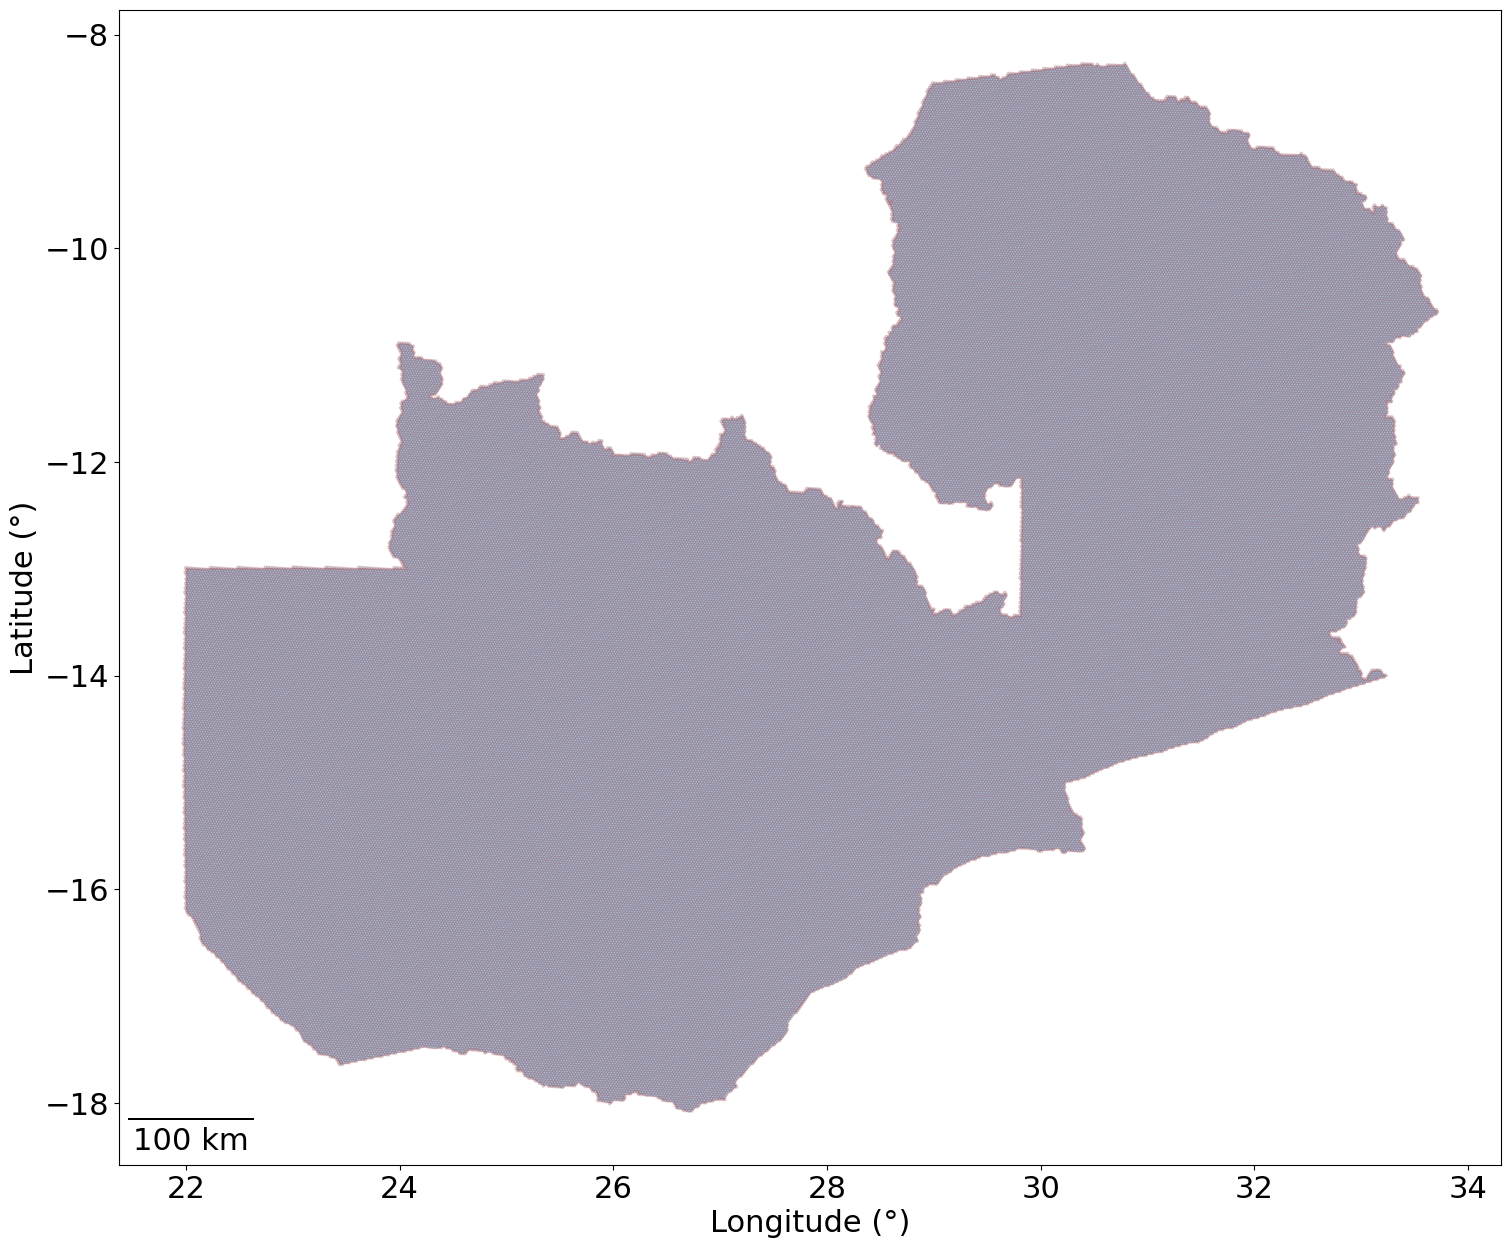

<Figure size 640x480 with 0 Axes>

In [5]:
%run basegridhex.py

# Part 2. Extract GIS-based attributes

## Extract information from vector layers

In [6]:
regions, admin_gdf, region_gdf, grid = load_initial_data(config)

Loading initial data...
Admin boundaries loaded. Country GDF: (1, 3), Region GDF: (10, 12)
Hexagon grid loaded: (122901, 11)


In [7]:
# transmission lines
mv_lines_gdf = gpd.read_file(config.MV_LINES_SHP)
hv_lines_gdf = gpd.read_file(config.HV_LINES_SHP)
# MV_O_lines_gdf = gpd.read_file(config.GRID_PATH / "Zambia - Distribution MV Overhead Line/" / "Zambia - Distribution MV Overhead Line.shp")
# MV_O_lines_gdf = gpd.clip(MV_O_lines_gdf, admin_gdf)
# MV_U_lines_gdf = gpd.read_file(config.GRID_PATH / "Zambia - Distribution MV Underground Line/" / "Distribution_Medium_Voltage_Underground_Line_Network_neww.shp")
# MV_U_lines_gdf = gpd.clip(MV_U_lines_gdf, admin_gdf)

# Part 3. Constructing Multi-vector Demand

### Calculate Total Demand

**Demand = Residential + Commercial + Industrial **

where, 

**Residential** = No of HH with access X average en. cons. kWh/HH/year

**Commercial**  = Number of employee X average en. con. kWh/employee

**Industrial**  = Commodity Production (tonnes) from mines X average energy consumption per tonne

In [ ]:
extracting_data = True

INFO: Successfully loaded configuration for Zambia from config.py.
Loading initial data...
Admin boundaries loaded. Country GDF: (1, 3), Region GDF: (10, 12)
Hexagon grid loaded: (122901, 11)
EPSG:4326
Extracting raster data...
EPSG:4326
2025-06-24 14:59:46.182067
Processed WorldPop Buildings Count.
2025-06-24 15:37:07.561516
Processed WorldPop Urban.
2025-06-24 17:52:06.229542
Processed HREA Lighting.
2025-06-24 20:47:59.148866
Processed RWI.
2025-06-25 08:41:48.406724
Processed Falchetta Tiers (Majority).
2025-06-25 10:00:08.152796
Processed Falchetta Tiers (Mean).
Converting features to GeoDataFrame...
2025-06-25 10:00:25.637542
EPSG:4326
Columns after renaming: Index(['geometry', 'h3_index', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'index',
       'NAME_1', 'id', 'buildingssum', 'locationWP', 'HREA', 'rwi',
       'tiers_falchetta_maj', 'tiers_falchetta_mean'],
      dtype='object')
EPSG:4326
EPSG:4326
EPSG:4326
Finished extracting and processing raster data.
EPSG:4326
Loading UN energy

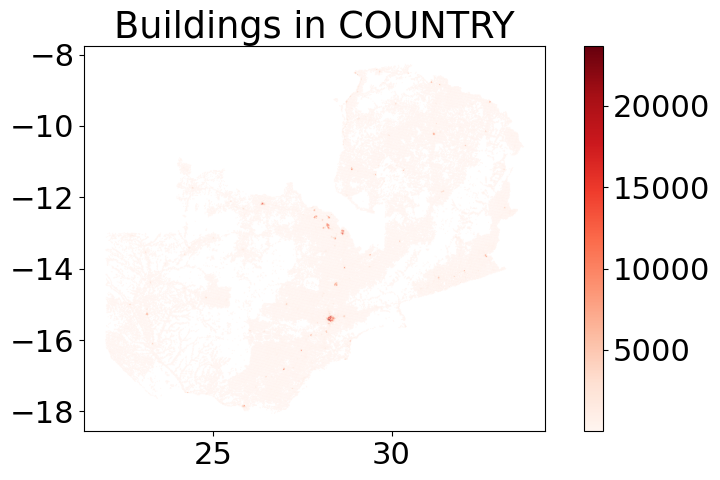

Total number of buildings: 9699726
Plotting HREA map...


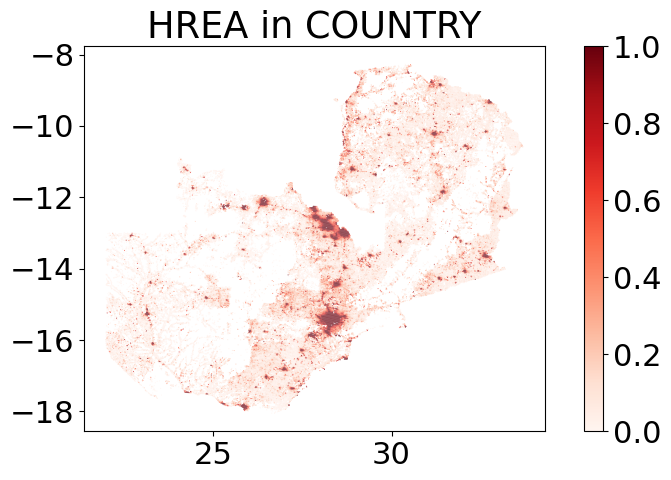

Determining location status (urban/rural)...
'location' column created. Counts: {'rural': 122247, 'urban': 654}
Plotting Urban/Rural map...


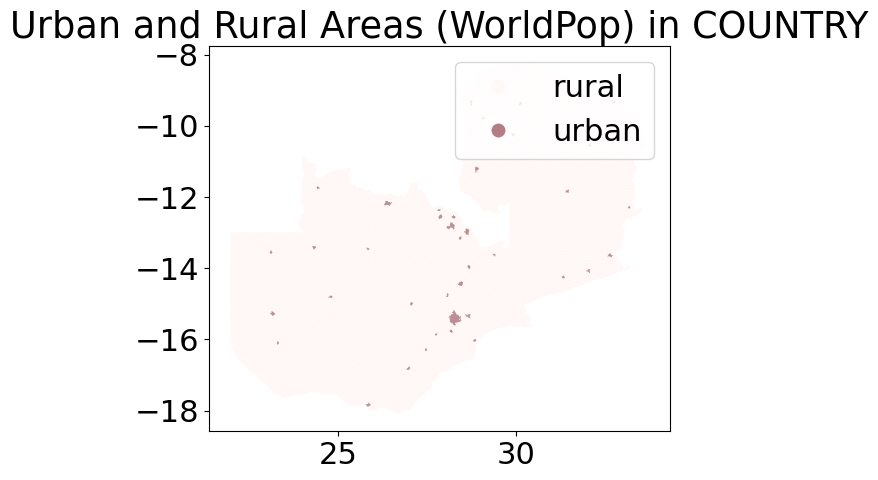

Determining electrification status...
--- Initial Data Sanity Check ---
Grid CRS: EPSG:4326 | Shape: (122901, 18)
Admin Boundary CRS: EPSG:4326 | Shape: (1, 3)
MV Lines CRS: EPSG:4326 | Shape: (64868, 49)
HV Lines CRS: EPSG:4326 | Shape: (931, 63)
Target CRS for all operations: EPSG:32735

--- Projecting all data to target CRS ---
Processing proximity for HV Lines with buffer 500m...
Processing proximity for MV Lines with buffer 500m...
Updated 'is_near_any_line' column. Current counts:
is_near_any_line
False    112043
True      10858
Name: count, dtype: int64
'status_electrified' column created. Counts: {'nonelec': 115639, 'elec': 7262}
Plotting Line Proximity map...


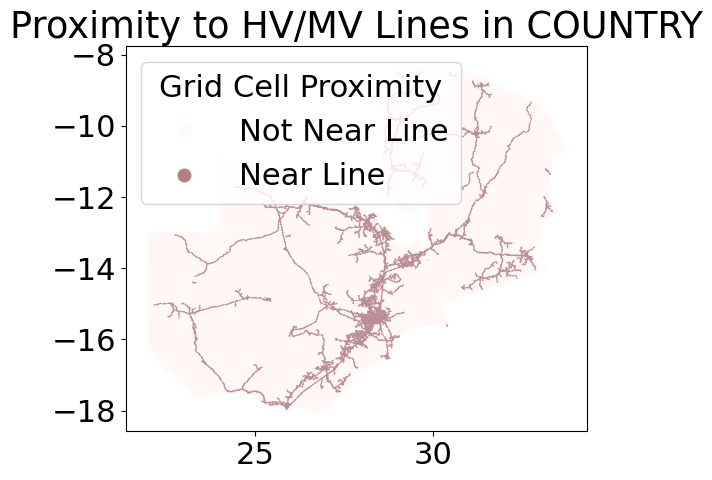

Calculating household numbers...
Total population calculated: 17,798,700
Finished calculating household numbers.
Estimating households with access...
Aggregating HH access data by region...
Total population with access (estimated): 173,667,846
Regional HH summary saved to C:\Users\amillot\PycharmProjects\EDeMOS\Buildings\Outputs\dataHH_region.csv
         accessRateHH accessRateHH_urban accessRateHH_rural
Central          0.34               0.94               0.46
Southern         0.38               0.99               0.53
Eastern          0.25               0.91               0.31
Lusaka           0.89               0.99               5.21
National         0.50               0.95               0.16
Finished estimating households with access.


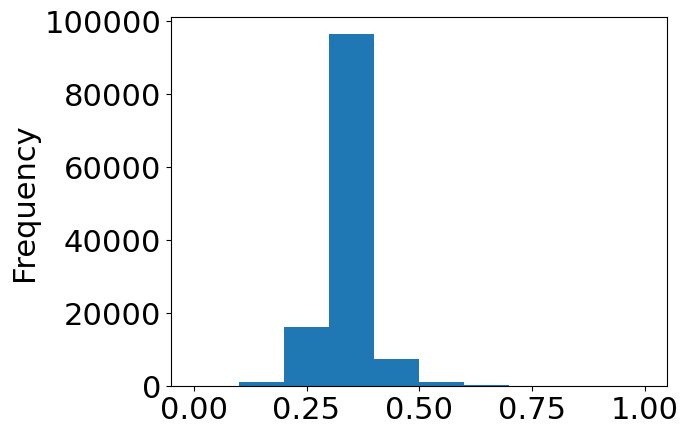

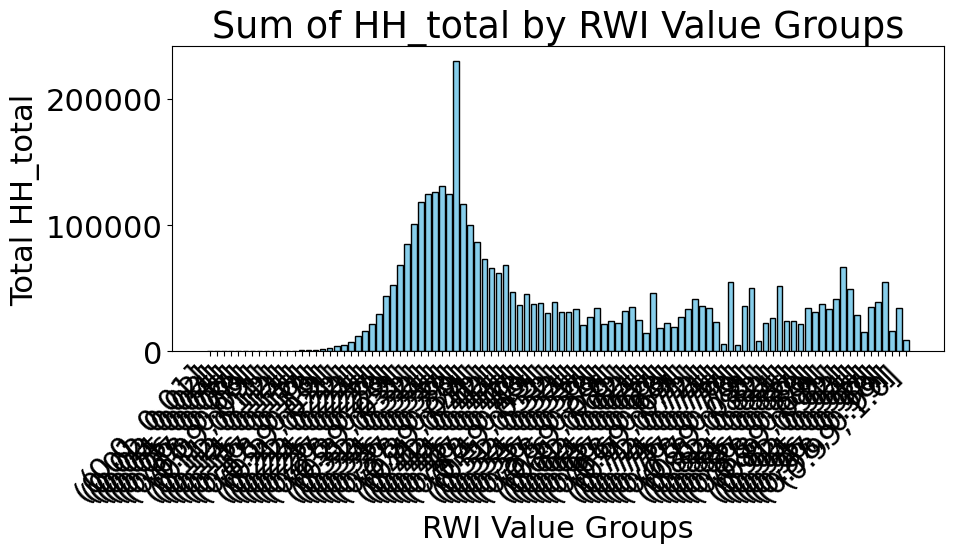

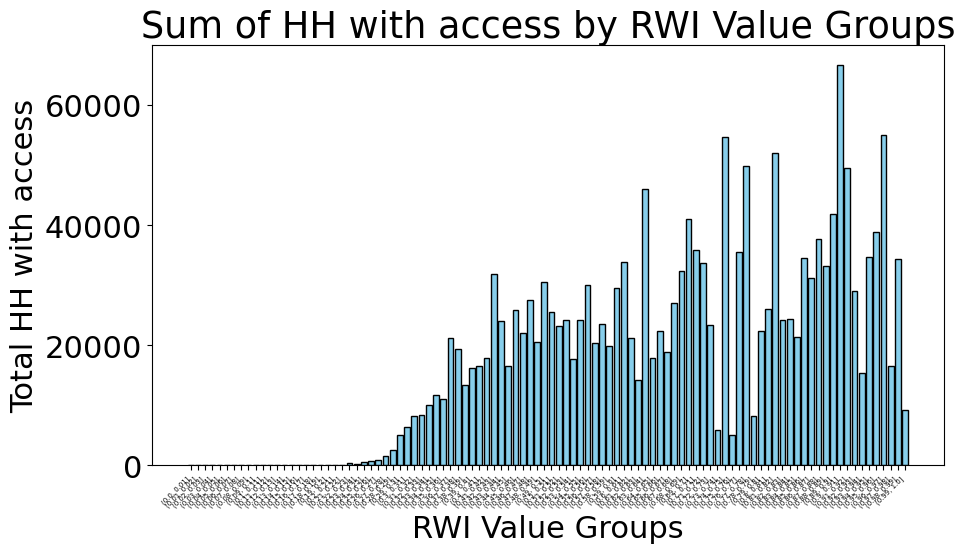

Calculating energy per HH (Method 1: RWI-logistic)...
Solved k for logistic function: 14.7871
Finished calculating energy per HH (Method 1).


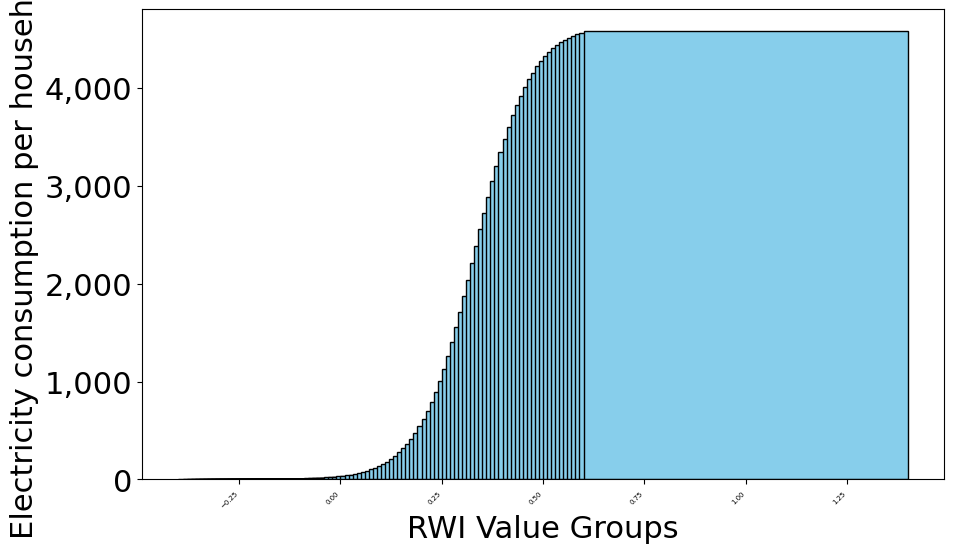

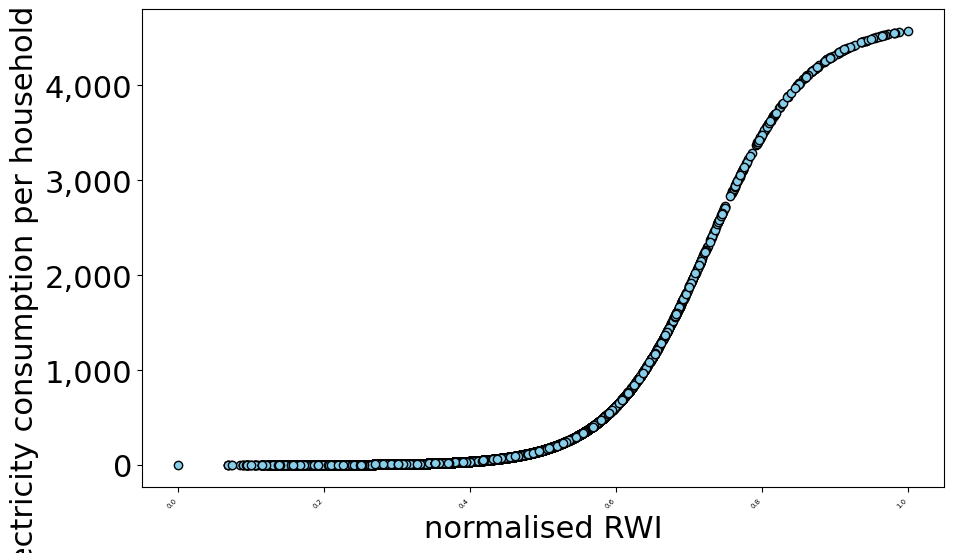

urban total = 3,397 GWh/year
urban average per household = 2,277 kWh/year
urban min = 0 kWh/year max = 3,450 kWh/year
Created rwi_vs_energy_use_urban.png


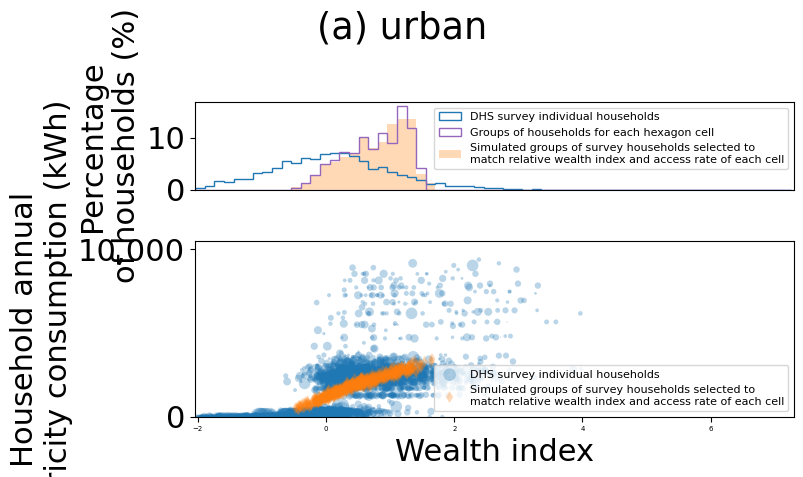

rural total = 32 GWh/year
rural average per household = 93 kWh/year
rural min = 0 kWh/year max = 727 kWh/year
Created rwi_vs_energy_use_rural.png


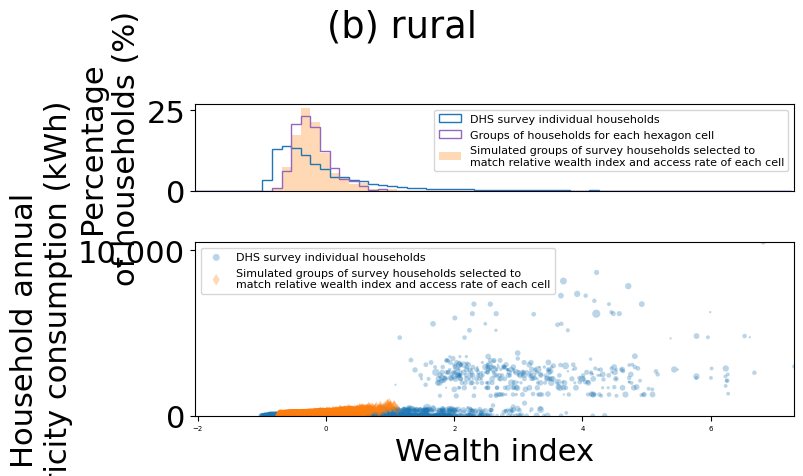

Calculating total residential energy and scaling...
Method meth1: Total Assessed = 4022.50 GWh, UN Stats = 4022.50 GWh, Scaling Factor = 1.0000
Method meth2: Total Assessed = 3417.67 GWh, UN Stats = 4022.50 GWh, Scaling Factor = 1.1770

Summary of energy consumption before scaling (GWh):
                 meth1    meth2
NAME_1                         
Central         164.17   182.43
Copperbelt    1,404.01 1,093.19
Eastern          85.54   127.18
Luapula          15.70    50.10
Lusaka        1,859.61 1,361.79
Muchinga          9.75    21.65
North-Western   144.16   152.55
Northern         70.96   105.50
Southern        230.76   246.20
Western          37.84    77.07

Summary of energy consumption after scaling (GWh):
                 meth1    meth2
NAME_1                         
Central         164.17   214.71
Copperbelt    1,404.01 1,286.66
Eastern          85.54   149.69
Luapula          15.70    58.96
Lusaka        1,859.61 1,602.79
Muchinga          9.75    25.48
North-Western   144

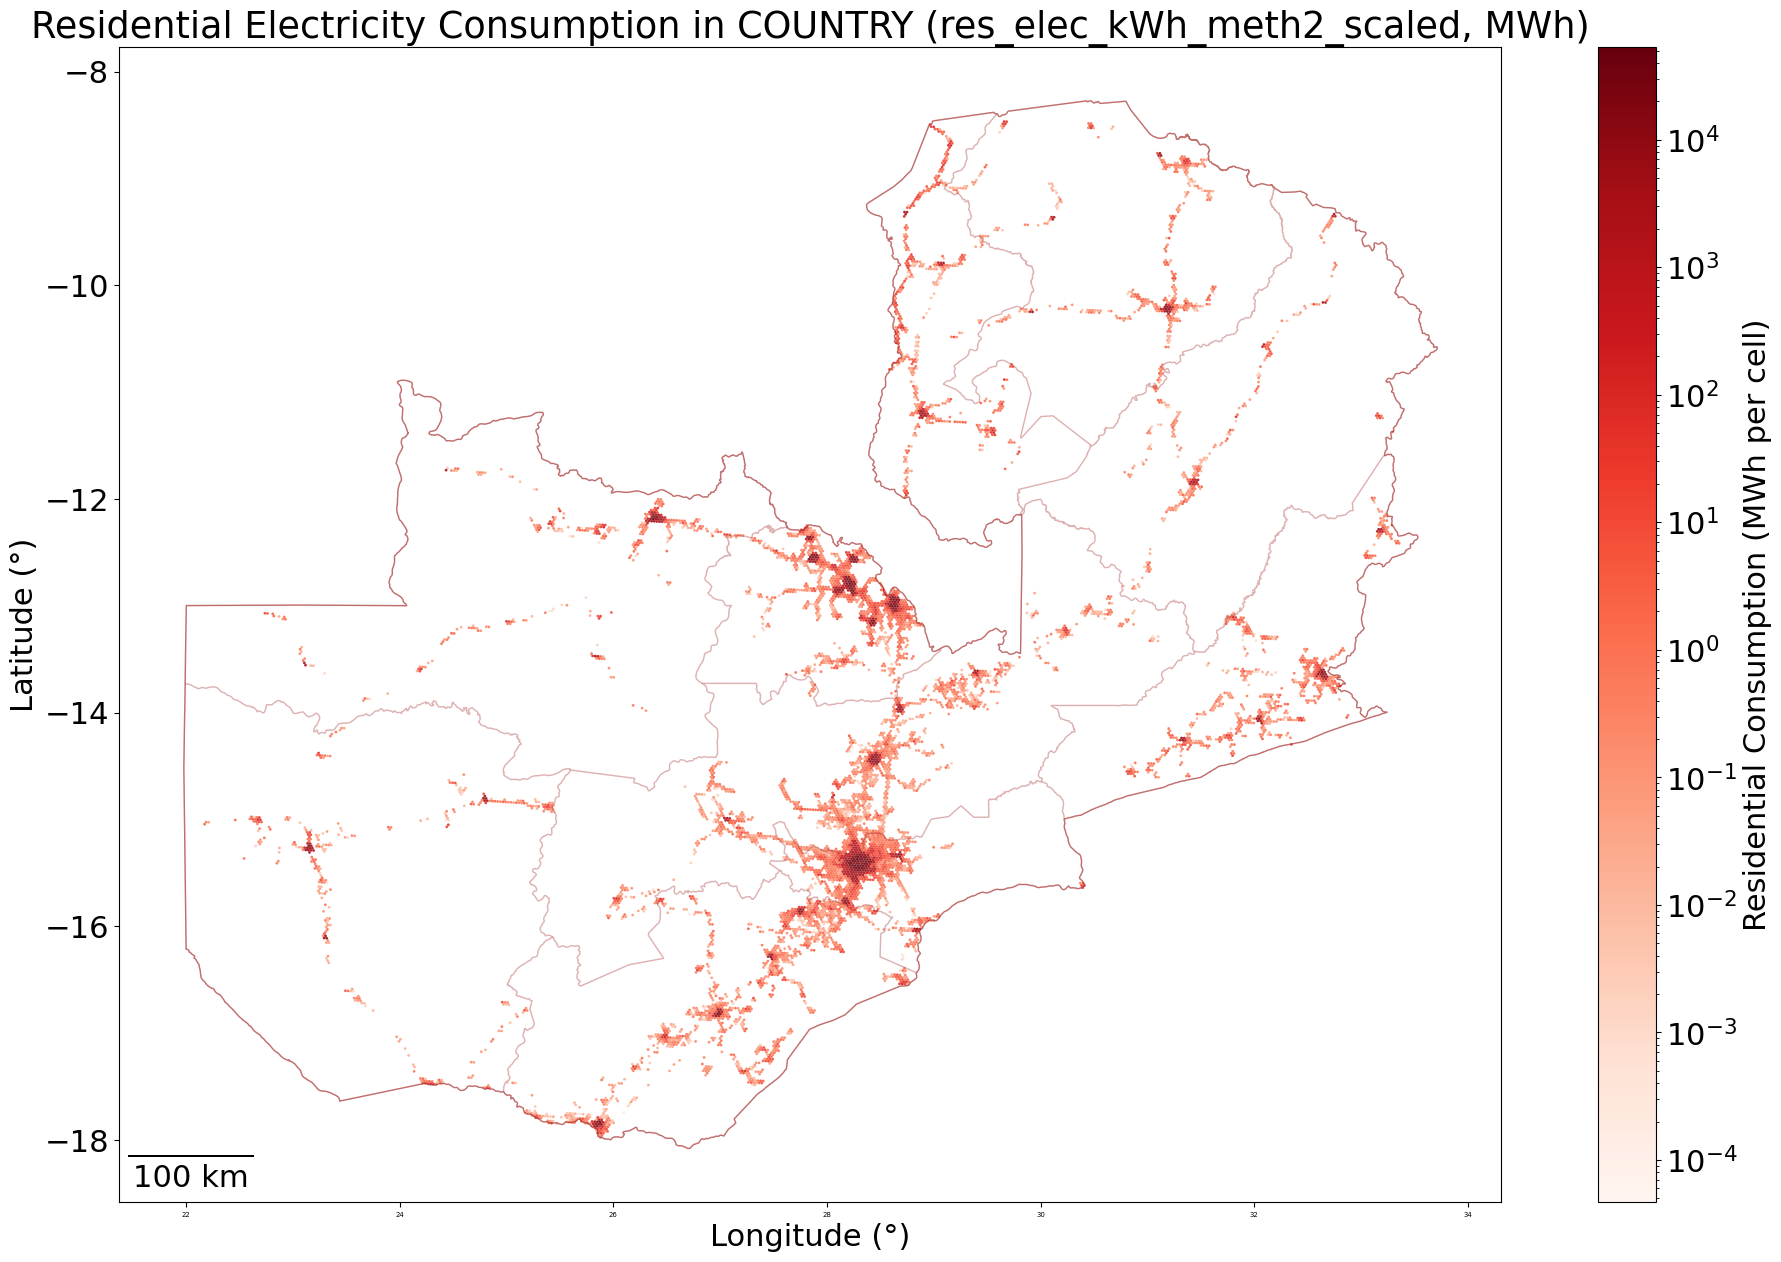

Calculating services electricity (building-based)...
Total services buildings with estimated access: 2,250,403
Service electricity per accessible building: 321 kWh/building
Finished calculating services electricity (building-based).
Calculating services energy (employee-based)...
  Calculating number of men and women (15-49)...
  Calculating number of working men and women...
Total employees with access: 1,994,978
Service electricity per accessible employee: 361.74 kWh/employee
Finished calculating services energy (employee-based).
Plotting Services Consumption map...


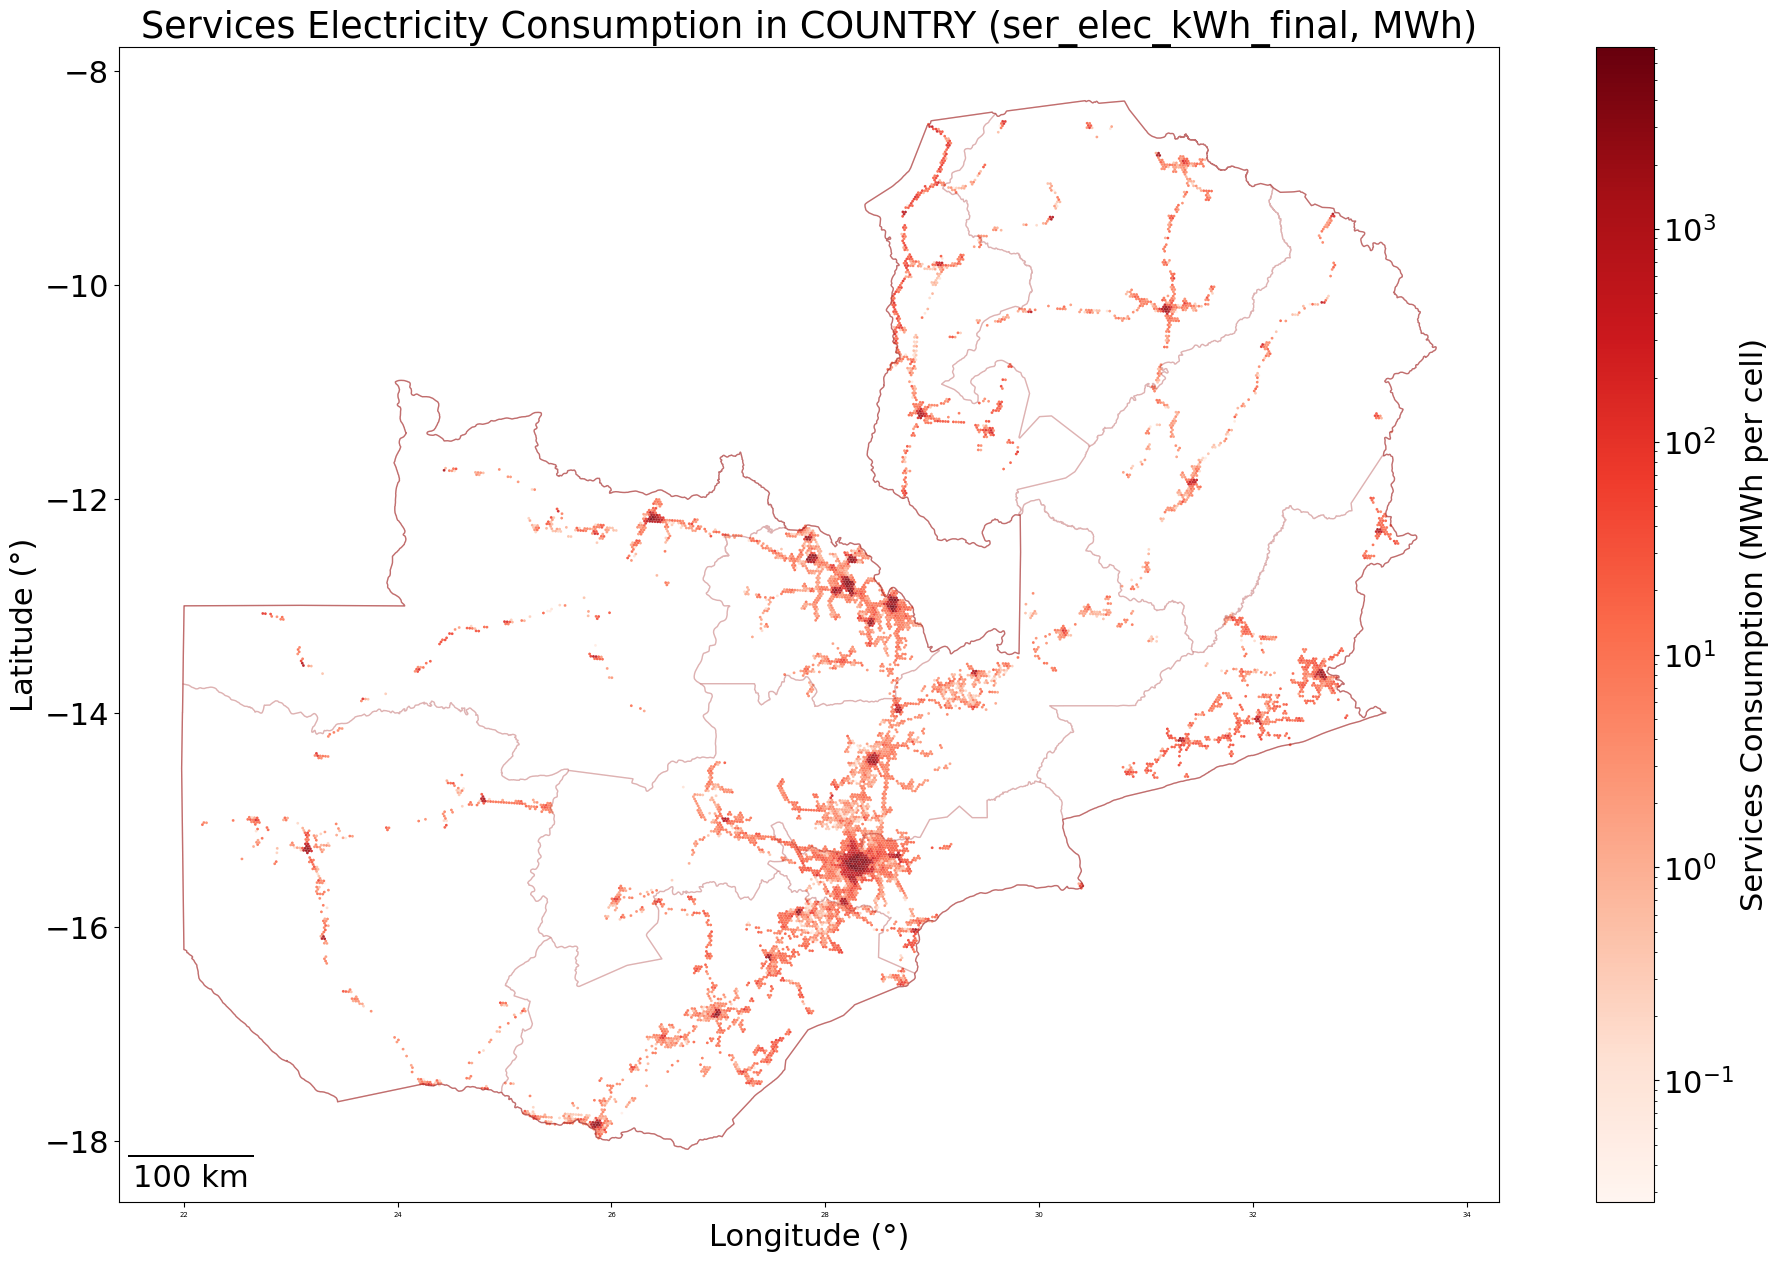

Services electricity consumption assessed after scaling:
Central 53.9 GWh
Copperbelt 196.4 GWh
Eastern 45.2 GWh
Luapula 26.8 GWh
Lusaka 235.8 GWh
Muchinga 7.3 GWh
North-Western 36.8 GWh
Northern 25.6 GWh
Southern 67.7 GWh
Western 26.0 GWh
NAME_1
Central          53.91
Copperbelt      196.44
Eastern          45.21
Luapula          26.80
Lusaka          235.84
Muchinga          7.28
North-Western    36.81
Northern         25.61
Southern         67.74
Western          26.01
Name: ser_elec_kWh_final, dtype: float64
721.6666666666666
Buildings electricity consumption assessed after scaling:
Central 268,625,234.3 GWh
Copperbelt 1,483,101,810.8 GWh
Eastern 194,897,763.2 GWh
Luapula 85,767,534.4 GWh
Lusaka 1,838,630,905.2 GWh
Muchinga 32,760,726.1 GWh
North-Western 216,361,318.0 GWh
Northern 149,782,130.7 GWh
Southern 357,517,540.1 GWh
Western 116,721,704.0 GWh
NAME_1
Central          268625234.32
Copperbelt      1483101810.78
Eastern          194897763.16
Luapula           85767534.37
Lusaka 

In [8]:
%run Buildings/building_demand.ipynb

In [9]:
total_residential_electricity_assessed = grid[config.COL_RES_ELEC_KWH_METH2].sum()
print("residential electricity consumption:", f"{total_residential_electricity_assessed/10**6:,.0f}","GWh") # GWh

residential electricity consumption: 3,418 GWh


Loading initial data...
Admin boundaries loaded. Country GDF: (1, 3), Region GDF: (10, 12)
Hexagon grid loaded: (122901, 11)
Production at a site  Fitwaola Open Pit Mine  in  Zambia  is missing (negative). Value set to zero. Please, change the input in the input file.
Production at a site  Fitwaola Open Pit Mine  in  Zambia  is missing (negative). Value set to zero. Please, change the input in the input file.
Production at a site  Mkushi Heap Leach  in  Zambia  is missing (negative). Value set to zero. Please, change the input in the input file.
Production at a site  Mufulira West Heap-Leach Facility  in  Zambia  is missing (negative). Value set to zero. Please, change the input in the input file.
Production at a site  TD3a, TD3b, TD5, and TD7 Tailings Dams  in  Zambia  is missing (negative). Value set to zero. Please, change the input in the input file.
File exists. Deleting it now...
File deleted.
Layers found in 'C:\Users\amillot\PycharmProjects\EDeMOS\Industry\Data\mines\mineral_fa

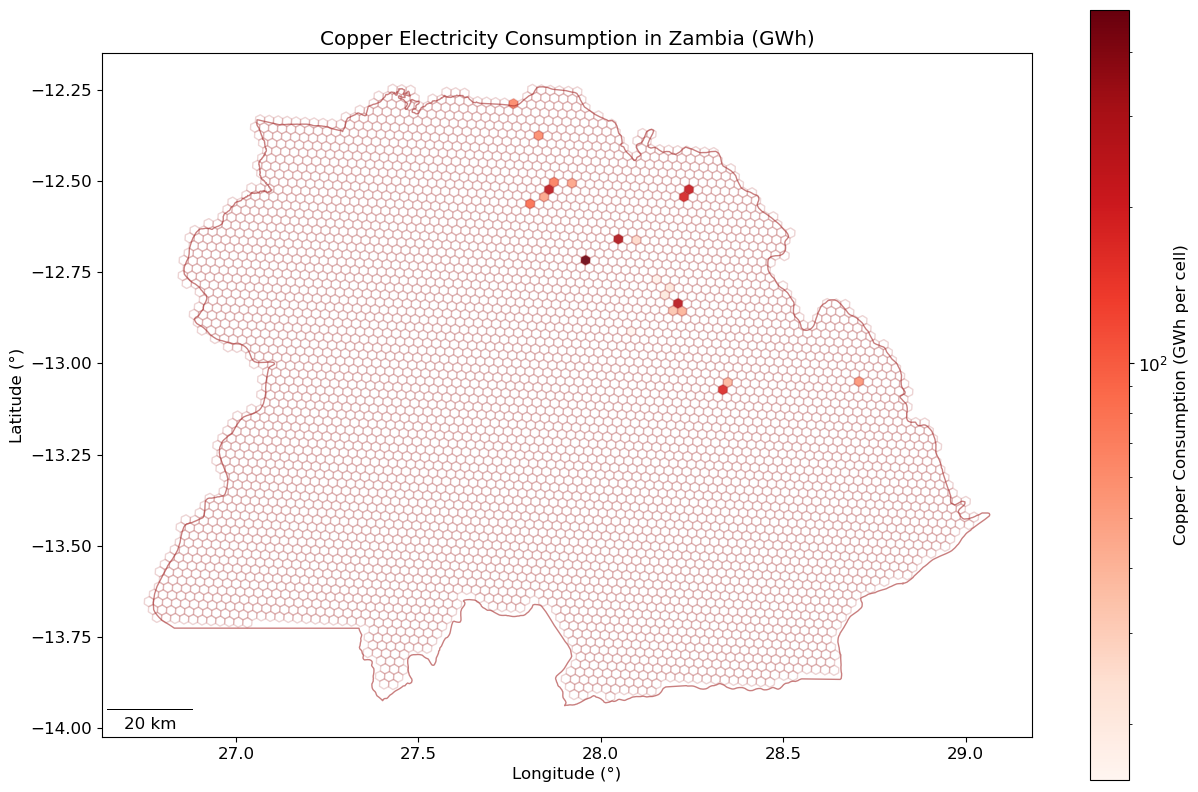

Plotting Copper Region Consumption map...


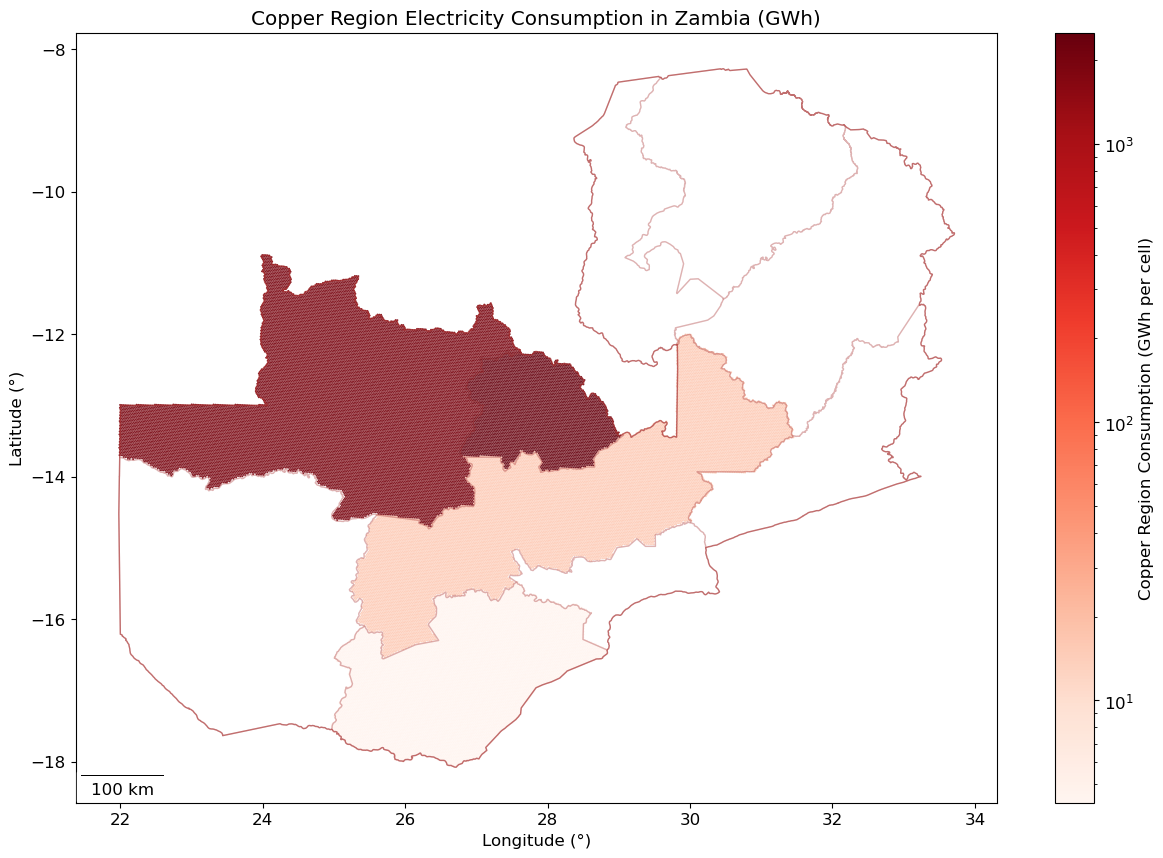

Industry electricity consumption in COUNTRY 5.2 TWh


In [43]:
%run Industry/industry_demand.ipynb
total_industry_electricity_beforescaling_tj = grid[config.COL_IND_ELEC_TJ].sum()
print("Industry electricity consumption in",f"{area}",f"{total_industry_electricity_beforescaling_tj/3600:,.1f}", "TWh")

In [44]:
# Concatenate results
out_path = config.OUTPUT_DIR
grid_buildings = gpd.read_file(config.BUILDINGS_GPKG_FILE) # contains services and residential data
grid_industry = gpd.read_file(config.INDUSTRY_GPKG_FILE)

grid = grid_buildings.copy()
grid = grid.merge(grid_industry, on='id', suffixes=('', '_y'))
grid.drop(grid.filter(regex='_y$').columns, axis=1, inplace=True)
grid.head(2)

h3_index     n0      n1           n2           n3           n4  \
0  879753661ffffff  44592   48497  42,103.0000  41,851.0000  32,577.0000   
1  879758832ffffff  35993  114444 106,897.0000 121,703.0000 114,034.0000   

           n5  index    NAME_1  id  ...  nb_men_working  total_employee  \
0 44,217.0000      0  Southern   1  ...          5.9433          9.7443   
1 52,740.0000      1   Western   2  ...          0.0000          0.0000   

   total_employee_withaccess  ser_elec_kWh_emp  SElec_kWh_weighted  \
0                     0.0000            0.0000              0.0000   
1                     0.0000            0.0000                 NaN   

   ser_elec_kWh_final                                           geometry  \
0              0.0000  POLYGON ((26.09731 -16.79199, 26.08433 -16.798...   
1                 NaN  POLYGON ((24.0273 -17.45984, 24.0143 -17.46579...   

   ind_elec_TJ copper_elec_TJ  ind_elec_scaled_kWh  
0          NaN            NaN                  NaN  
1          NaN            NaN                  NaN  

[2 rows x 72 columns]

In [47]:
# Units
grid[config.COL_IND_ELEC_GWH]=grid[config.COL_IND_ELEC_SCALED_TJ]/3.6
grid[config.COL_IND_ELEC_KWH]=grid[config.COL_IND_ELEC_GWH] * 10**6
total_ind_electricity_gwh = grid[config.COL_IND_ELEC_GWH].sum()
print(f"Industry: {total_ind_electricity_gwh:,.0f}", "GWh")
grid[config.COL_RES_ELEC_KWH_FINAL] = grid[config.COL_RES_ELEC_KWH_METH2_SCALED]
total_res_electricity_gwh = grid[config.COL_RES_ELEC_KWH_FINAL].sum() / 10**6
print(f"Residential: {total_res_electricity_gwh:,.0f}", "GWh")
total_ser_electricity_gwh = grid[config.COL_SER_ELEC_KWH_FINAL].sum() / 10**6
print(f"Services: {total_ser_electricity_gwh:,.0f}", "GWh")

Industry: 6,587 GWh
Residential: 4,022 GWh
Services: 722 GWh


In [48]:
grid[config.COL_TOTAL_ELEC_KWH] = grid.apply(lambda row: (np.nansum([row[config.COL_RES_ELEC_KWH_FINAL], 
                                          row[config.COL_SER_ELEC_KWH_FINAL],  
                                             row[config.COL_IND_ELEC_KWH]
                                                     ])), axis=1)
total_elec_gwh = grid[config.COL_TOTAL_ELEC_KWH].sum() / 10**6
print("total electricity consumption:", f"{total_elec_gwh:,.0f}","GWh") 

total electricity consumption: 11,332 GWh


### Export result

In [49]:
grid.to_file(config.TOTAL_ELECTRICITY_GPKG_FILE, driver="GPKG", index=False, engine='fiona')

## Print maps for quick assessment

### Total demand map

Plotting Total Consumption map...


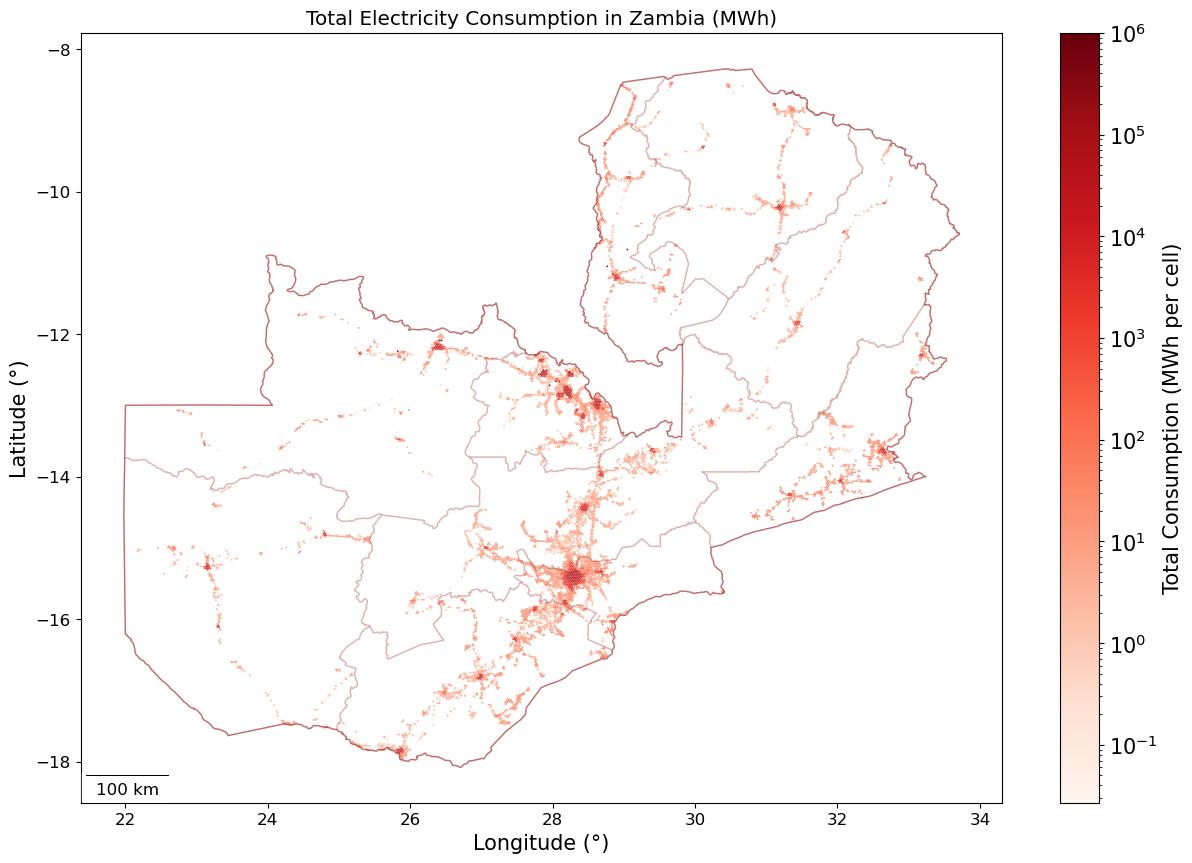

In [51]:
plot_sector_consumption_map(grid, config.COL_TOTAL_ELEC_KWH, config, admin_gdf, region_gdf, 'Total',
                           fig_size=(15, 10))

### Residential map

Plotting Residential Consumption map...


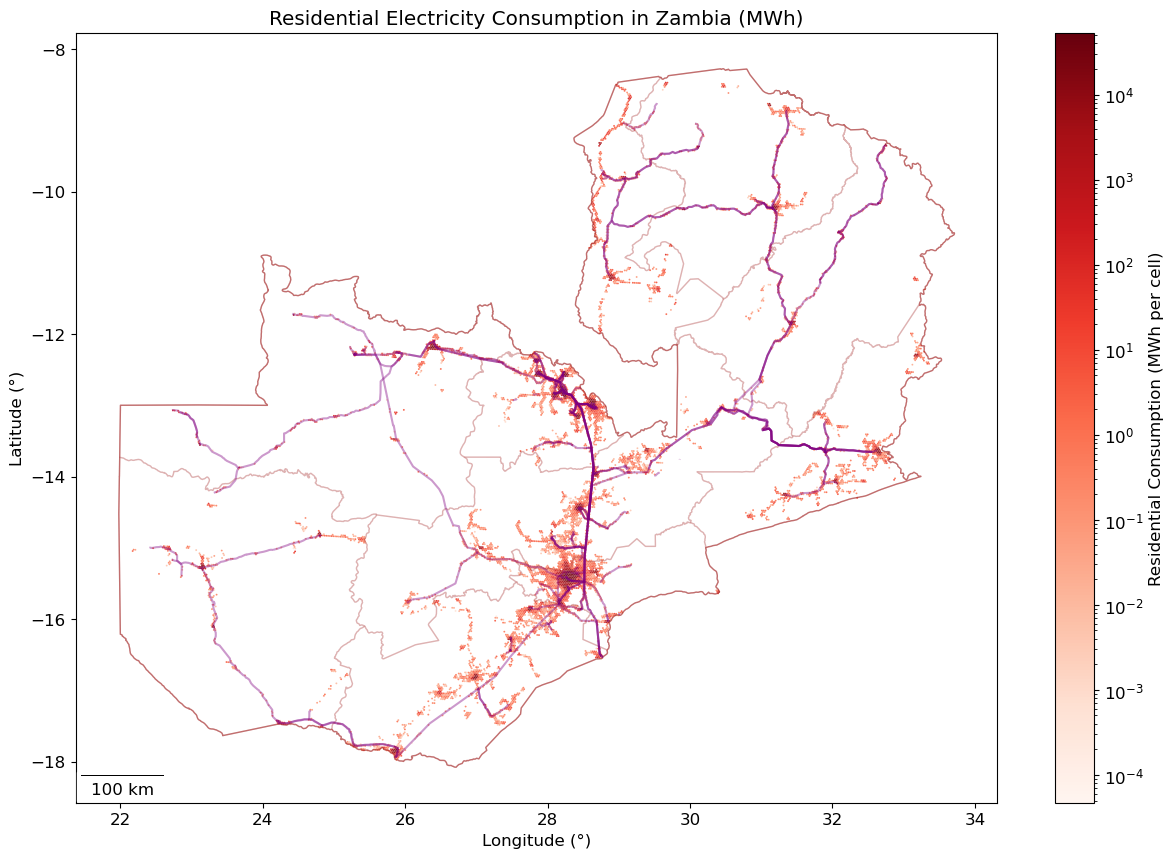

In [52]:
plot_sector_consumption_map(grid, config.COL_RES_ELEC_KWH_FINAL, config, admin_gdf, region_gdf, 'Residential', lines_gdf=hv_lines_gdf, 
                           fig_size=(15, 10))

### Services map

Plotting Services Consumption map...


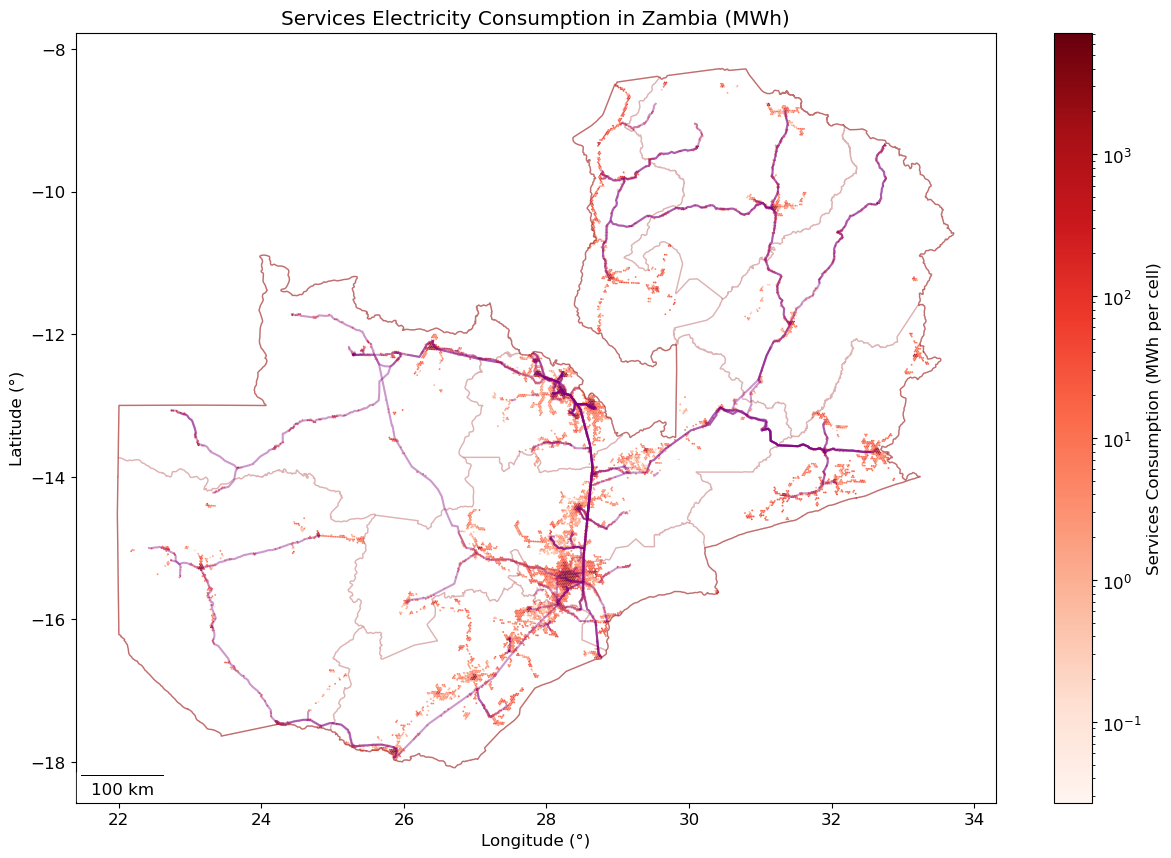

In [53]:
plot_sector_consumption_map(grid, config.COL_SER_ELEC_KWH_FINAL, config, admin_gdf, region_gdf, 'Services', lines_gdf=hv_lines_gdf, 
                           fig_size=(15, 10))

### Buildings map

In [54]:
plot_sector_consumption_map(grid, config.COL_BUI_ELEC_KWH_FINAL, config, admin_gdf, region_gdf,  'Buildings', lines_gdf=hv_lines_gdf,
                           fig_size=(15, 10))

Plotting Buildings Consumption map...


### Industry map

Plotting Industry Consumption map...


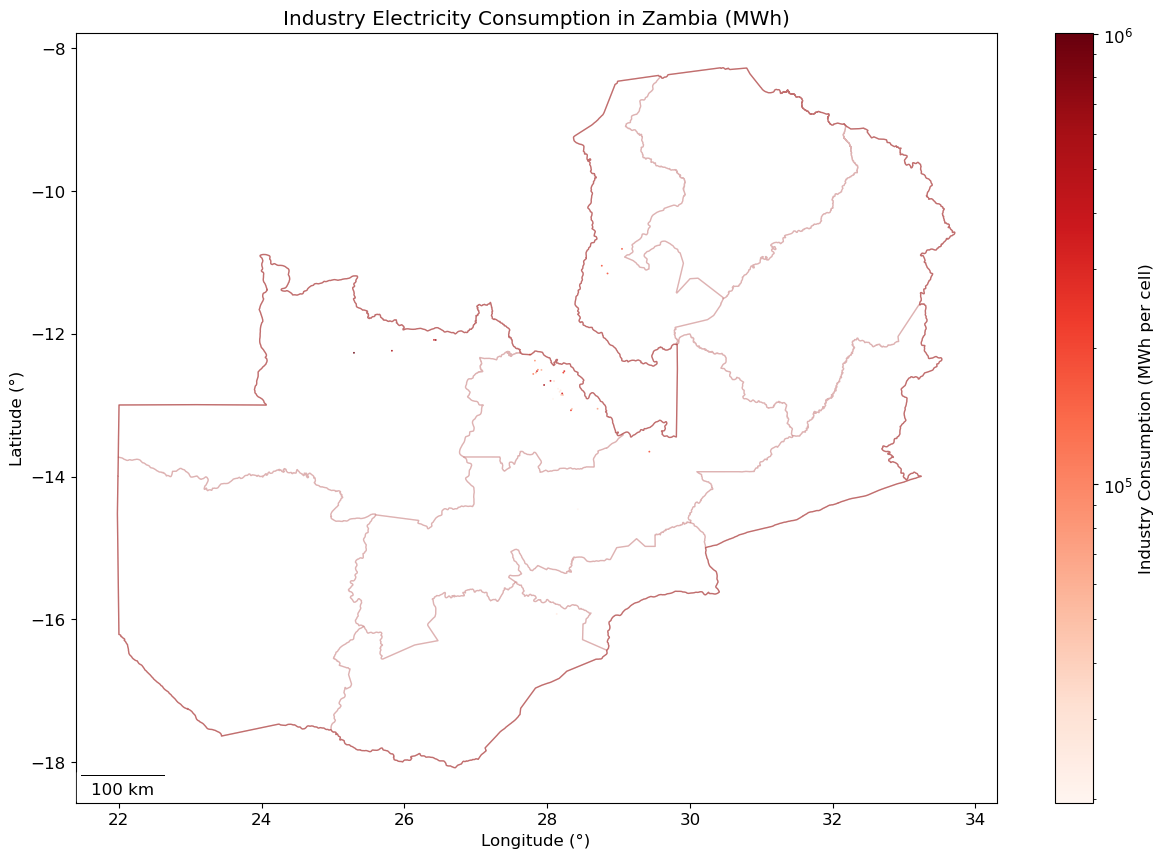

In [55]:
plot_sector_consumption_map(grid, config.COL_IND_ELEC_KWH, config, admin_gdf, region_gdf, 'Industry', lines_gdf=None, 
                           fig_size=(15, 10))

In [56]:
total_industry_elec_perregion_gwh=grid.groupby(config.COL_ADMIN_NAME)[config.COL_IND_ELEC_GWH].sum()
total_industry_elec_perregion_gwh

NAME_1
Central           198.5864
Copperbelt      3,180.9165
Eastern             0.0000
Luapula           537.0055
Lusaka              0.0000
Muchinga            0.0000
North-Western   2,646.6168
Northern            0.0000
Southern           24.3748
Western             0.0000
Name: ind_elec_GWh, dtype: float64

In [57]:
grid['total_industry_elec_perregion_gwh'] = grid[config.COL_ADMIN_NAME].map(total_industry_elec_perregion_gwh)

Plotting Industry Region Consumption map...


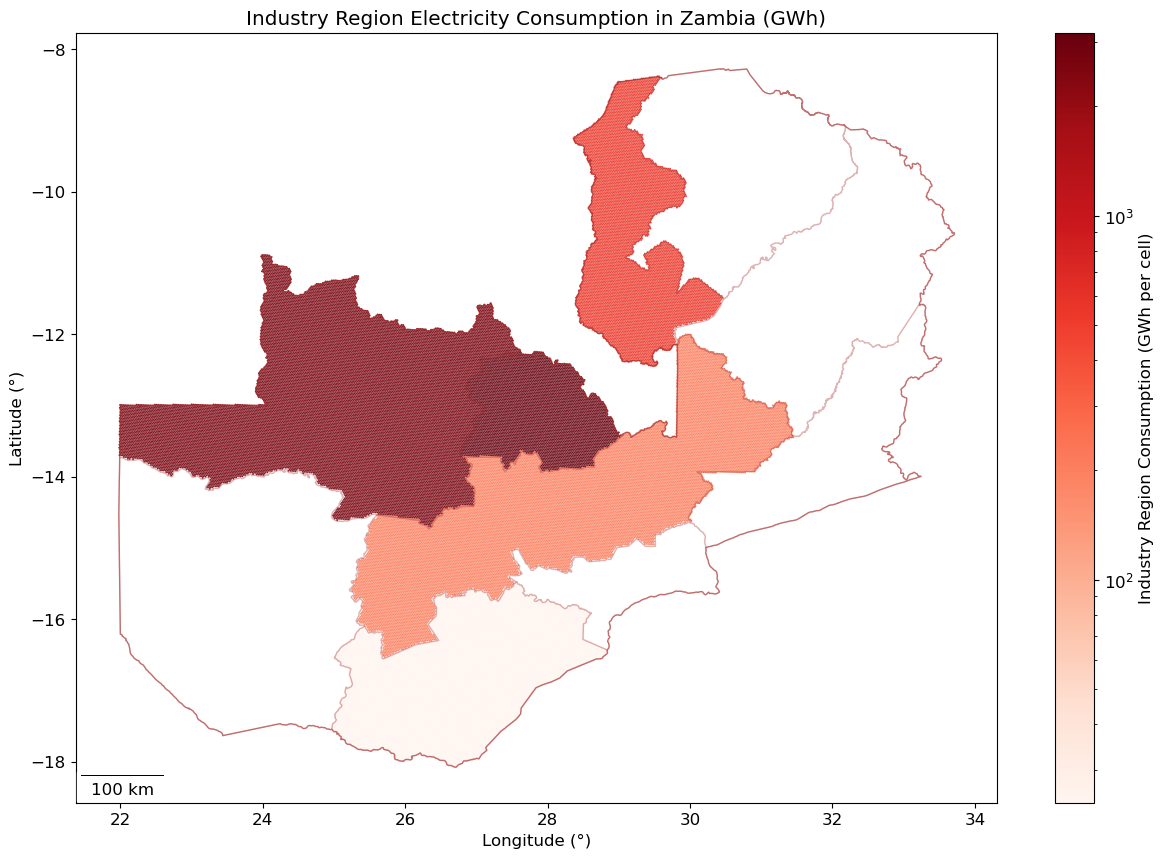

In [58]:
plot_sector_consumption_map(grid, 'total_industry_elec_perregion_gwh', config, admin_gdf, region_gdf, 'Industry Region', lines_gdf=None, 
                           fig_size=(15, 10))